<a href="https://colab.research.google.com/github/A01173639/Regresion-Lineal/blob/main/EUA_ACT6_1_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df_eua=pd.read_csv("EUA_clean.csv")


In [55]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df_eua[df_eua['room_type'] == 'Private room']
hotel_room = df_eua[df_eua['room_type'] == 'Hotel room']

# Unir ambos DataFrames en uno solo
filtered_df = pd.concat([private_room, hotel_room])

#**“host_acceptance_rate vs host_response_rate”**

In [59]:
filtered_df['host_response_rate'] = filtered_df['host_response_rate'].astype(str)  # convert to string type
filtered_df['host_response_rate'] = filtered_df['host_response_rate'].str.replace('%', '')  # Remove percentage symbol
filtered_df['host_response_rate'] = pd.to_numeric(filtered_df['host_response_rate'], errors='coerce')  # Convert to numeric


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

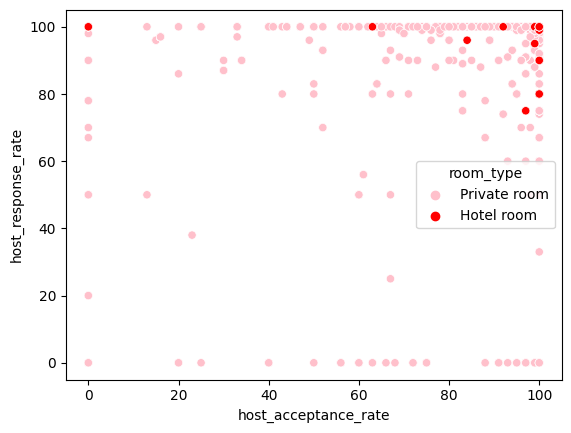

In [60]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [94]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['host_acceptance_rate']]
Var_Dep= filtered_df['host_response_rate']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [95]:

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [96]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1515792]),
 'rank_': 1,
 'singular_': array([995.06686069]),
 'intercept_': 79.82871449995316}

**Modelo matemático: y= 0.15157x +79.828714**

---




In [97]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02489244446532357

In [99]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['host_acceptance_rate']])
y_pred

array([90.89399641, 93.47084288, 89.98452118, ..., 94.98663492,
       79.8287145 , 94.98663492])

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

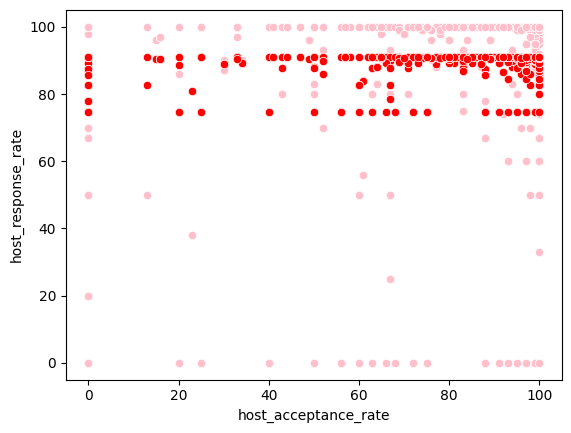

In [101]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=filtered_df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [102]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.02489244446532357
Coeficiente de correlación:  0.1577733959364619


#**“host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

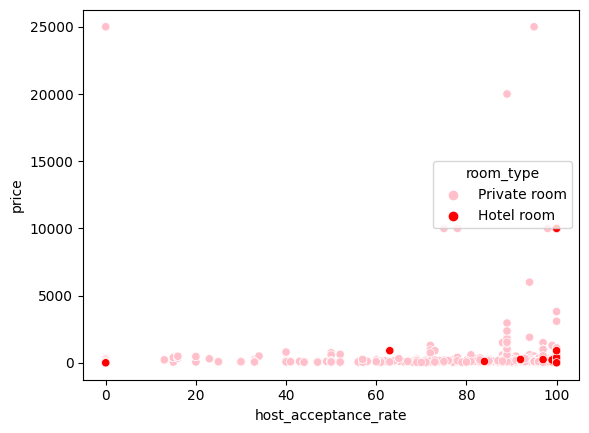

In [91]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [105]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['host_acceptance_rate']]
Var_Dep= filtered_df['price']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.87273413]),
 'rank_': 1,
 'singular_': array([995.06686069]),
 'intercept_': 788.6424927405269}

**Modelo matematico: -3.8727x + 788.6424**

In [106]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0015109875509661252

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

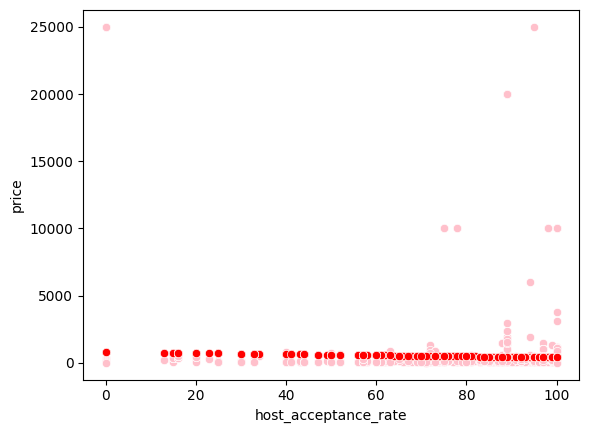

In [113]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['host_acceptance_rate']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=filtered_df)
sns.scatterplot(x='host_acceptance_rate', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [114]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0015109875509661252
Coeficiente de correlación:  0.03887142332055935


#**host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

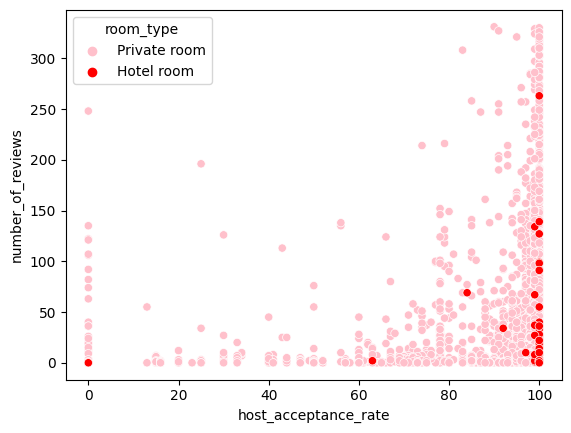

In [116]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [117]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['host_acceptance_rate']]
Var_Dep= filtered_df['number_of_reviews']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.50028637]),
 'rank_': 1,
 'singular_': array([995.06686069]),
 'intercept_': -3.596950972483569}

**Modelo matematico : y= 0.5002x +(-3.5969)**

In [118]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.023482259192691646

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

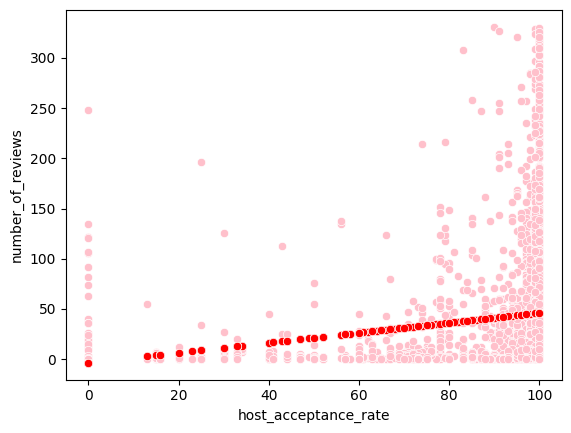

In [119]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['host_acceptance_rate']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=filtered_df)
sns.scatterplot(x='host_acceptance_rate', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [120]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.023482259192691646
Coeficiente de correlación:  0.15323922210939223


#**review_scores_location vs review_scores_cleanliness**


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

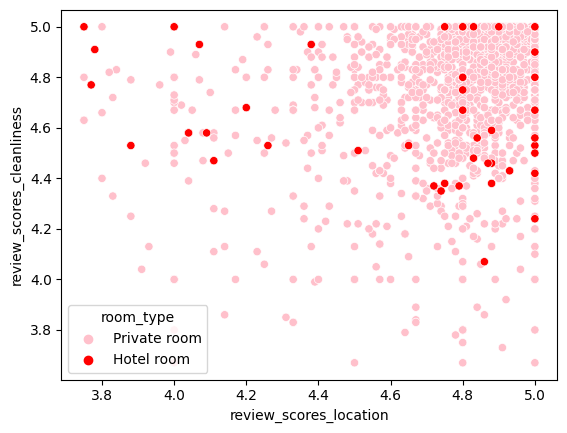

In [121]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [122]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['review_scores_location']]
Var_Dep= filtered_df['review_scores_cleanliness']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.3007819]),
 'rank_': 1,
 'singular_': array([10.82858097]),
 'intercept_': 3.333432874580483}

**Modelo matematico: y = 0.3007x+3.3334**

In [123]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0745509495750809

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

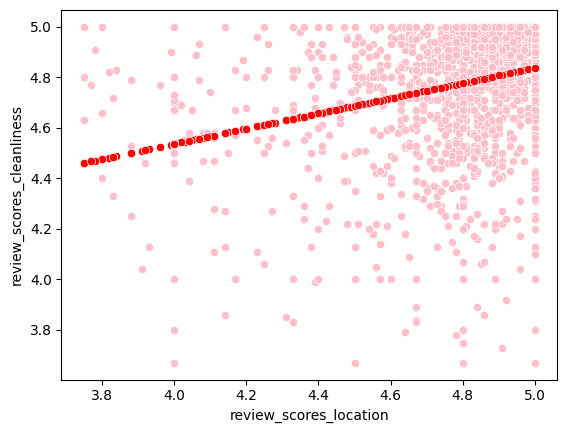

In [124]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['review_scores_location']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=filtered_df)
sns.scatterplot(x='review_scores_location', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [125]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0745509495750809
Coeficiente de correlación:  0.27304019772751575


#**availability_365 vs number_of_reviews**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

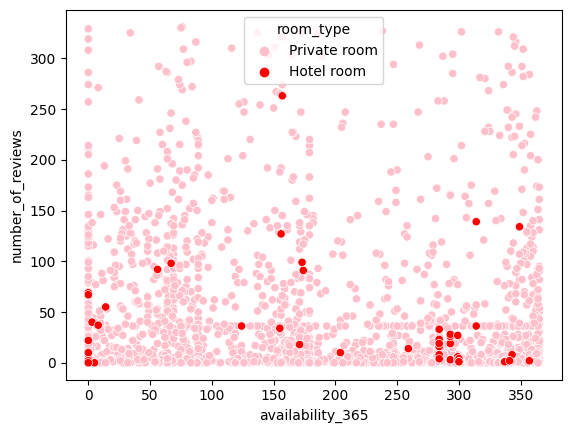

In [126]:
#Imprimimos el scatter plot entre la variable dependiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [127]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['availability_365']]
Var_Dep= filtered_df['number_of_reviews']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.02988506]),
 'rank_': 1,
 'singular_': array([6642.08856193]),
 'intercept_': 46.65944551366974}

**Modelo matematico : y=0.02988x+ 46.6594**

In [128]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.003733493954844125

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

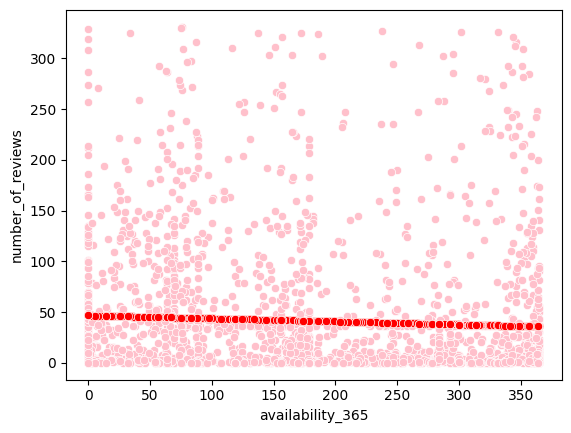

In [129]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['availability_365']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=filtered_df)
sns.scatterplot(x='availability_365', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [130]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.003733493954844125
Coeficiente de correlación:  0.061102323645211114


#**reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

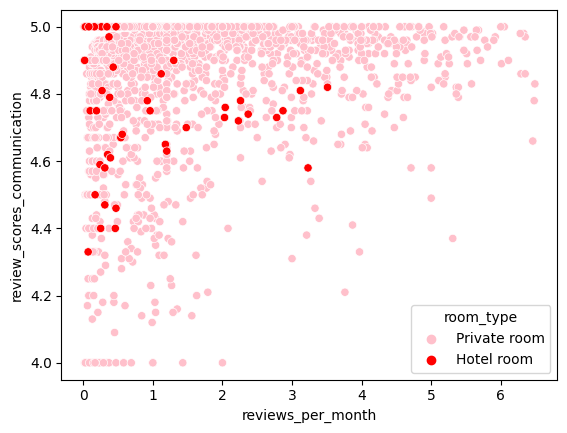

In [132]:
#Imprimimos el scatter plot entre la variable dependiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', hue='room_type', palette={'Private room': 'pink', 'Hotel room': 'red'}, data=filtered_df)

#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [133]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= filtered_df[['reviews_per_month']]
Var_Dep= filtered_df['review_scores_communication']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Verificamos la función relacionada al modelo
type(model)

# Fit the model with the independent and dependent variables
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00798527]),
 'rank_': 1,
 'singular_': array([62.52828303]),
 'intercept_': 4.858886856009807}

**Modelo matematico: y = 0.0079x+4.8588**

In [134]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0028359405572518925

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

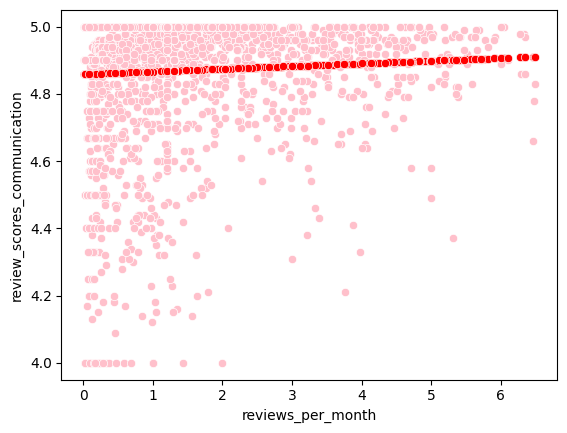

In [135]:
#Predecimos los valores de total 
y_pred= model.predict(X=filtered_df[['reviews_per_month']])
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=filtered_df)
sns.scatterplot(x='reviews_per_month', y= y_pred,color="red", data=filtered_df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [136]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0028359405572518925
Coeficiente de correlación:  0.05325354971503677
